In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from tqdm import tqdm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
def norm(data):
    return (data)/(max(data))

In [531]:
appa1 = pd.read_csv("data/appa1.csv")

# Data

| ts        | The time the data was taken (date time)                                                                      |
|-----------|--------------------------------------------------------------------------------------------------------------|
| Rs1 - Rs8 | Resistance value of all 8 sensors, usually paired the same way (1,2) (3,4)...                                |
| Rh1 - Rh8 | Resistance value of the heaters, ideally should stay stable or correlated to tempurature                     |
| Vh1 - Vh8 | Voltage of the heater                                                                                        |
| T         | Temperature in C                                                                                             |
| RH        | Relative Humidity                                                                                            |
| P         | Air pressure                                                                                                 |
| BME       | Volatile Organic Compounds (VOC), from the BME280 sensor. Likely unrelated but added because its extra data! |

In [532]:
appa1.columns
appa1 = appa1.drop(columns='Unnamed: 0')

In [53]:
appa1.at[381849, "Time"] = pd.to_datetime("Tue Jan 12 2021 15:39:26 GMT+0000") + pd.to_timedelta(1, unit="min")

In [513]:
appa1

,"sensing_,material",signal_res,heater_res,heater_V,Temperature,Relative_Humidity,Pressure,time_cos,time_sin,date_cos,date_sin,Y,age
ts,,,,,,,,,,,,,
2021-01-13 00:00:00,ZnOR,NaN,NaN,NaN,NaN,NaN,NaN,0.261799,0.00000,0.282902,0.440593,2021,0 days 00:00:00
2021-01-13 00:00:00,ZnOR,NaN,NaN,NaN,NaN,NaN,NaN,0.261799,0.00000,0.282902,0.440593,2021,0 days 00:00:00
2021-01-13 00:00:00,LaFeO3,NaN,NaN,NaN,NaN,NaN,NaN,0.261799,0.00000,0.282902,0.440593,2021,0 days 00:00:00
2021-01-13 00:00:00,LaFeO3,NaN,NaN,NaN,NaN,NaN,NaN,0.261799,0.00000,0.282902,0.440593,2021,0 days 00:00:00
2021-01-13 00:00:00,WO3,NaN,NaN,NaN,NaN,NaN,NaN,0.261799,0.00000,0.282902,0.440593,2021,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25 14:00:00,WO3,215141240.0,147.50,2.565,41.85,19.95,985.55,0.035798,0.25934,0.394742,0.343997,2022,452 days 14:00:00
2022-07-25 14:00:00,ZnOR,499000000.0,128.45,3.890,41.85,19.95,985.55,0.035798,0.25934,0.394742,0.343997,2022,558 days 14:00:00
2022-07-25 14:00:00,ZnOR,499000000.0,129.15,4.020,41.85,19.95,985.55,0.035798,0.25934,0.394742,0.343997,2022,558 days 14:00:00


In [533]:
appa1 = appa1.rename(columns = {"ts": "Time", "T": "Temperature", "RH": "Relative_Humidity", "P": "Pressure", "T": "Temperature", "T": "Temperature", "BME": "VOC"})

# interpolate NaN values
for i, row in tqdm(appa1.iterrows(), total=len(appa1)):
    if type(row.Time) != str:
        print(i, appa1.iloc[i-1].Time, appa1.iloc[i].Time)
        appa1.at[i, "Time"] = pd.to_datetime(" ".join(appa1.iloc[i-1].Time.split(" ")[:6])) + pd.to_timedelta(1, unit="m")

 33%|███▎      | 386391/1183842 [00:10<00:17, 46578.95it/s]

381849 Tue Jan 12 2021 15:39:26 GMT+0000 (Greenwich Mean Time) nan
381855 Tue Jan 12 2021 18:03:32 GMT+0000 (Greenwich Mean Time) nan
381868 Wed Jan 13 2021 08:57:04 GMT+0000 (Greenwich Mean Time) nan


 46%|████▌     | 540626/1183842 [00:13<00:13, 46315.07it/s]

534385 Thu Apr 29 2021 13:16:26 GMT+0100 (British Summer Time) nan


 81%|████████  | 957391/1183842 [00:22<00:04, 48467.05it/s]

952173 Mon Feb 14 2022 07:01:20 GMT+0000 (Greenwich Mean Time) nan


 97%|█████████▋| 1143596/1183842 [00:26<00:00, 48755.00it/s]

1134025 Mon Jun 20 2022 21:27:15 GMT+0100 (British Summer Time) nan


 97%|█████████▋| 1153356/1183842 [00:26<00:00, 48651.66it/s]

1147942 Thu Jun 30 2022 14:05:23 GMT+0100 (British Summer Time) nan


100%|██████████| 1183842/1183842 [00:27<00:00, 43489.03it/s]

1179259 Fri Jul 22 2022 09:14:22 GMT+0100 (British Summer Time) nan


In [534]:
appa1.Time = pd.to_datetime(appa1.Time.map(lambda x:  " ".join(x.split(" ")[:6]) if type(x) == str else x), utc=True)

In [535]:
appa1 = appa1.set_index("Time")

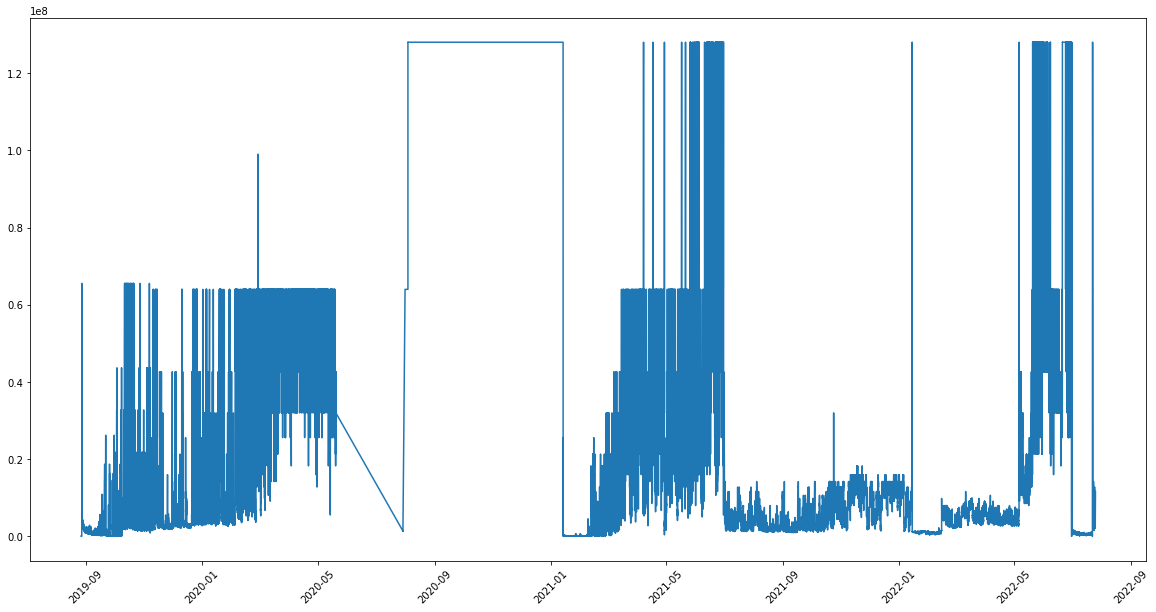

In [306]:
plt.figure(figsize=(20,10))
plt.plot(appa1_time.Rs1)
plt.xticks(rotation=45)
plt.show()

In [536]:
appa_clean

,ZnOR_1,ZnOR_2,LaFeO3_1,LaFeO3_2,WO3_1,WO3_2,ZnOR_heatR_1,ZnOR_heatR_2,LaFeO3_heatR_1,LaFeO3_heatR_2,...,ZnOR_heatV_2,LaFeO3_heatV_1,LaFeO3_heatV_2,WO3_heatV_1,WO3_heatV_2,Temperature,Relative_Humidity,Pressure,VOC,TimeSinceCreated
Time,,,,,,,,,,,,,,,,,,,,,
2021-01-14 00:00:39+00:00,228164.0,127363.0,639265.0,513355.0,920201.0,1392602.0,102.1,99.4,88.2,87.5,...,3.98,3.01,3.07,4.03,4.03,48.1,3.8,988.4,2983.74,0
2021-01-14 00:01:39+00:00,228571.0,127363.0,640320.0,512697.0,919257.0,1390009.0,102.1,99.4,88.2,87.5,...,3.99,3.01,3.07,4.02,4.03,48.1,3.8,988.6,2998.87,0
2021-01-14 00:02:39+00:00,228164.0,126984.0,639648.0,513479.0,918598.0,1391737.0,102.1,99.4,88.2,87.5,...,3.98,3.01,3.07,4.03,4.03,48.2,3.8,988.5,2995.5,0
2021-01-14 00:03:39+00:00,228164.0,126984.0,638022.0,512307.0,918033.0,1388286.0,102.1,99.4,88.2,87.5,...,3.98,3.01,3.07,4.02,4.03,48.2,3.7,988.6,3009.05,0
2021-01-14 00:04:39+00:00,227758.0,126858.0,638914.0,512492.0,916437.0,1388502.0,102.1,99.4,88.1,87.5,...,3.98,3.0,3.07,4.02,4.03,48.2,3.7,988.5,3003.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25 14:57:59+00:00,499000000.0,499000000.0,11636364.0,744186.0,32080200.0,209836064.0,128.5,129.0,500.0,111.3,...,4.03,3.91,3.65,2.39,2.57,41.5,19.5,985.5,5467.63,0
2022-07-25 14:58:59+00:00,499000000.0,499000000.0,11636364.0,739884.0,32820512.0,224561408.0,128.6,129.0,500.0,111.2,...,4.03,3.91,3.64,2.39,2.57,41.6,19.1,985.5,5501.55,0
2022-07-25 14:59:59+00:00,499000000.0,499000000.0,11636364.0,748538.0,32653062.0,220689648.0,128.5,129.1,500.0,111.2,...,4.03,3.91,3.64,2.39,2.57,41.7,19.4,985.5,5490.2,0


In [459]:
#appa1.columns
appa1_hr = pd.DataFrame(columns = ['Time', 'Rs1', 'Rs2', 'Rs3', 'Rs4', 'Rs5', 'Rs6', 'Rs7', 'Rs8', 'Rh1',
       'Rh2', 'Rh3', 'Rh4', 'Rh5', 'Rh6', 'Rh7', 'Rh8', 'Vh1', 'Vh2', 'Vh3',
       'Vh4', 'Vh5', 'Vh6', 'Vh7', 'Vh8', 'Temperature', 'Relative_Humidity',
       'Pressure', 'VOC'])

for i in tqdm(range(0, len(appa1)-60, 60), total=int(len(appa1)-60)/60):
       row = appa1.iloc[i:i+60].mean(axis=0)
       temp = [appa1.iloc[i].Time]
       temp[1:] = row
       appa1_hr.loc[len(appa1_hr.index)] = temp
       

100%|█████████▉| 19722/19729.7 [02:02<00:00, 150.70it/s]/usr/local/anaconda3/lib/python3.9/site-packages/tqdm/std.py:533: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
100%|██████████| 19730/19729.7 [02:02<00:00, 161.20it/s]


In [413]:
appa1_hr

,Time,Rs1,Rs2,Rs3,Rs4,Rs5,Rs6,Rs7,Rs8,Rh1,...,Vh3,Vh4,Vh5,Vh6,Vh7,Vh8,Temperature,Relative_Humidity,Pressure,VOC
0,2019-08-26 18:15:38+00:00,8.442924e+06,8.519749e+07,3.660411e+08,3.550200e+08,4.990000e+08,4.990000e+08,4.990000e+08,4.990000e+08,76.730000,...,0.353333,0.356500,0.351667,0.353333,0.355667,0.359500,27.643333,54.935000,988.243333,378.862667
1,2019-08-27 16:01:41+00:00,3.688220e+07,1.310720e+08,4.990000e+08,4.990000e+08,4.990000e+08,4.990000e+08,4.990000e+08,4.990000e+08,73.050000,...,0.354333,0.357833,0.354167,0.358333,0.357833,0.365833,28.375000,53.660000,992.775000,502.152167
2,2019-08-27 17:02:33+00:00,1.543209e+07,3.426140e+07,1.266045e+08,1.270713e+08,4.582075e+08,4.566434e+08,2.093848e+08,1.768738e+08,108.778333,...,3.307833,3.326500,3.269167,3.283333,3.588667,3.365500,34.188333,41.591667,992.486667,482.208167
3,2019-08-27 18:03:26+00:00,2.104751e+06,3.888875e+06,4.551243e+06,4.694948e+06,4.990000e+08,4.770748e+08,1.220728e+08,7.505715e+07,121.210000,...,4.309667,4.331000,4.487833,4.506333,4.690833,4.368833,37.861667,33.023333,992.485000,488.320333
4,2019-08-27 19:04:19+00:00,1.932827e+06,3.206606e+06,5.333100e+06,5.011784e+06,4.339941e+08,3.442738e+08,1.231950e+08,7.588989e+07,121.126667,...,4.309500,4.332500,4.488333,4.507500,4.690833,4.369833,37.811667,33.371667,992.901667,500.728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19725,2022-07-25 09:20:16+00:00,3.050078e+06,8.697393e+05,3.036945e+07,2.076281e+08,4.990000e+08,4.990000e+08,3.847504e+07,3.285689e+08,500.000000,...,2.389667,2.569333,3.893667,4.021667,3.950167,4.332000,35.288333,32.296667,990.666667,2347.686333
19726,2022-07-25 10:20:24+00:00,4.317771e+06,8.062667e+05,4.255768e+07,3.072884e+08,4.990000e+08,4.990000e+08,3.158873e+07,3.526001e+08,500.000000,...,2.389667,2.570500,3.893500,4.022500,3.949833,4.332333,35.653333,31.215000,990.000000,2931.085667
19727,2022-07-25 11:20:31+00:00,6.218481e+06,7.659899e+05,5.475404e+07,4.243341e+08,4.990000e+08,4.990000e+08,2.667558e+07,3.659995e+08,500.000000,...,2.390000,2.569667,3.894333,4.022000,3.949333,4.332833,36.453333,29.051667,989.051667,3815.159167
19728,2022-07-25 12:20:39+00:00,8.626032e+06,7.399048e+05,6.034823e+07,4.886439e+08,4.990000e+08,4.990000e+08,2.301014e+07,3.719886e+08,500.000000,...,2.389500,2.569333,3.893000,4.022833,3.950000,4.331333,37.165000,27.306667,988.058333,4870.664833


In [415]:
appa1_hr.to_csv("exports/appa1_hr.csv")
appa1_gt = pd.read_csv("exports/appa1_gt_clean_withCO.csv")
appa1_marco = pd.read_csv("appa1_gt.csv")
appa1_hr['time'] = appa1_marco['Time']
#appa1_hr.time = pd.to_datetime(appa1_hr.time)
#appa1_hr.time = appa1_hr.time.dt.tz_localize(None)
appa1_hr.head()

,Time,Rs1,Rs2,Rs3,Rs4,Rs5,Rs6,Rs7,Rs8,Rh1,...,Vh4,Vh5,Vh6,Vh7,Vh8,Temperature,Relative_Humidity,Pressure,VOC,time
0,2019-08-26 18:15:38+00:00,8.442924e+06,8.519749e+07,3.660411e+08,3.550200e+08,4.990000e+08,4.990000e+08,4.990000e+08,4.990000e+08,76.730000,...,0.356500,0.351667,0.353333,0.355667,0.359500,27.643333,54.935000,988.243333,378.862667,2020-07-31 01:00:00
1,2019-08-27 16:01:41+00:00,3.688220e+07,1.310720e+08,4.990000e+08,4.990000e+08,4.990000e+08,4.990000e+08,4.990000e+08,4.990000e+08,73.050000,...,0.357833,0.354167,0.358333,0.357833,0.365833,28.375000,53.660000,992.775000,502.152167,2020-07-31 02:00:00
2,2019-08-27 17:02:33+00:00,1.543209e+07,3.426140e+07,1.266045e+08,1.270713e+08,4.582075e+08,4.566434e+08,2.093848e+08,1.768738e+08,108.778333,...,3.326500,3.269167,3.283333,3.588667,3.365500,34.188333,41.591667,992.486667,482.208167,2020-07-31 03:00:00
3,2019-08-27 18:03:26+00:00,2.104751e+06,3.888875e+06,4.551243e+06,4.694948e+06,4.990000e+08,4.770748e+08,1.220728e+08,7.505715e+07,121.210000,...,4.331000,4.487833,4.506333,4.690833,4.368833,37.861667,33.023333,992.485000,488.320333,2020-07-31 04:00:00
4,2019-08-27 19:04:19+00:00,1.932827e+06,3.206606e+06,5.333100e+06,5.011784e+06,4.339941e+08,3.442738e+08,1.231950e+08,7.588989e+07,121.126667,...,4.332500,4.488333,4.507500,4.690833,4.369833,37.811667,33.371667,992.901667,500.728000,2020-07-31 05:00:00


In [416]:
appa1_hr

,Time,Rs1,Rs2,Rs3,Rs4,Rs5,Rs6,Rs7,Rs8,Rh1,...,Vh4,Vh5,Vh6,Vh7,Vh8,Temperature,Relative_Humidity,Pressure,VOC,time
0,2019-08-26 18:15:38+00:00,8.442924e+06,8.519749e+07,3.660411e+08,3.550200e+08,4.990000e+08,4.990000e+08,4.990000e+08,4.990000e+08,76.730000,...,0.356500,0.351667,0.353333,0.355667,0.359500,27.643333,54.935000,988.243333,378.862667,2020-07-31 01:00:00
1,2019-08-27 16:01:41+00:00,3.688220e+07,1.310720e+08,4.990000e+08,4.990000e+08,4.990000e+08,4.990000e+08,4.990000e+08,4.990000e+08,73.050000,...,0.357833,0.354167,0.358333,0.357833,0.365833,28.375000,53.660000,992.775000,502.152167,2020-07-31 02:00:00
2,2019-08-27 17:02:33+00:00,1.543209e+07,3.426140e+07,1.266045e+08,1.270713e+08,4.582075e+08,4.566434e+08,2.093848e+08,1.768738e+08,108.778333,...,3.326500,3.269167,3.283333,3.588667,3.365500,34.188333,41.591667,992.486667,482.208167,2020-07-31 03:00:00
3,2019-08-27 18:03:26+00:00,2.104751e+06,3.888875e+06,4.551243e+06,4.694948e+06,4.990000e+08,4.770748e+08,1.220728e+08,7.505715e+07,121.210000,...,4.331000,4.487833,4.506333,4.690833,4.368833,37.861667,33.023333,992.485000,488.320333,2020-07-31 04:00:00
4,2019-08-27 19:04:19+00:00,1.932827e+06,3.206606e+06,5.333100e+06,5.011784e+06,4.339941e+08,3.442738e+08,1.231950e+08,7.588989e+07,121.126667,...,4.332500,4.488333,4.507500,4.690833,4.369833,37.811667,33.371667,992.901667,500.728000,2020-07-31 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19725,2022-07-25 09:20:16+00:00,3.050078e+06,8.697393e+05,3.036945e+07,2.076281e+08,4.990000e+08,4.990000e+08,3.847504e+07,3.285689e+08,500.000000,...,2.569333,3.893667,4.021667,3.950167,4.332000,35.288333,32.296667,990.666667,2347.686333,NaT
19726,2022-07-25 10:20:24+00:00,4.317771e+06,8.062667e+05,4.255768e+07,3.072884e+08,4.990000e+08,4.990000e+08,3.158873e+07,3.526001e+08,500.000000,...,2.570500,3.893500,4.022500,3.949833,4.332333,35.653333,31.215000,990.000000,2931.085667,NaT
19727,2022-07-25 11:20:31+00:00,6.218481e+06,7.659899e+05,5.475404e+07,4.243341e+08,4.990000e+08,4.990000e+08,2.667558e+07,3.659995e+08,500.000000,...,2.569667,3.894333,4.022000,3.949333,4.332833,36.453333,29.051667,989.051667,3815.159167,NaT
19728,2022-07-25 12:20:39+00:00,8.626032e+06,7.399048e+05,6.034823e+07,4.886439e+08,4.990000e+08,4.990000e+08,2.301014e+07,3.719886e+08,500.000000,...,2.569333,3.893000,4.022833,3.950000,4.331333,37.165000,27.306667,988.058333,4870.664833,NaT


In [420]:
for i, row in tqdm(appa1_hr.iterrows(), total = len(appa1_hr)):
    appa1_hr.at[i, "time"] = row.Time.replace(microsecond=0, second=0, minute=0)
#appa1_hr.Time = appa1_hr.Time.dt.round('60min')

100%|██████████| 19730/19730 [00:00<00:00, 25288.23it/s]


In [428]:
appa1_hr = appa1_hr.rename(columns = {"Time": "time", "time":"Time"})


In [433]:
appa1_hr.Time = pd.to_datetime(appa1_hr.Time)
appa1_hr.Time = appa1_hr.Time.dt.tz_localize(None)
appa1_hr

,time,Rs1,Rs2,Rs3,Rs4,Rs5,Rs6,Rs7,Rs8,Rh1,...,Vh4,Vh5,Vh6,Vh7,Vh8,Temperature,Relative_Humidity,Pressure,VOC,Time
0,2019-08-26 18:15:38,8.442924e+06,8.519749e+07,3.660411e+08,3.550200e+08,4.990000e+08,4.990000e+08,4.990000e+08,4.990000e+08,76.730000,...,0.356500,0.351667,0.353333,0.355667,0.359500,27.643333,54.935000,988.243333,378.862667,2019-08-26 18:00:00
1,2019-08-27 16:01:41,3.688220e+07,1.310720e+08,4.990000e+08,4.990000e+08,4.990000e+08,4.990000e+08,4.990000e+08,4.990000e+08,73.050000,...,0.357833,0.354167,0.358333,0.357833,0.365833,28.375000,53.660000,992.775000,502.152167,2019-08-27 16:00:00
2,2019-08-27 17:02:33,1.543209e+07,3.426140e+07,1.266045e+08,1.270713e+08,4.582075e+08,4.566434e+08,2.093848e+08,1.768738e+08,108.778333,...,3.326500,3.269167,3.283333,3.588667,3.365500,34.188333,41.591667,992.486667,482.208167,2019-08-27 17:00:00
3,2019-08-27 18:03:26,2.104751e+06,3.888875e+06,4.551243e+06,4.694948e+06,4.990000e+08,4.770748e+08,1.220728e+08,7.505715e+07,121.210000,...,4.331000,4.487833,4.506333,4.690833,4.368833,37.861667,33.023333,992.485000,488.320333,2019-08-27 18:00:00
4,2019-08-27 19:04:19,1.932827e+06,3.206606e+06,5.333100e+06,5.011784e+06,4.339941e+08,3.442738e+08,1.231950e+08,7.588989e+07,121.126667,...,4.332500,4.488333,4.507500,4.690833,4.369833,37.811667,33.371667,992.901667,500.728000,2019-08-27 19:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19725,2022-07-25 09:20:16,3.050078e+06,8.697393e+05,3.036945e+07,2.076281e+08,4.990000e+08,4.990000e+08,3.847504e+07,3.285689e+08,500.000000,...,2.569333,3.893667,4.021667,3.950167,4.332000,35.288333,32.296667,990.666667,2347.686333,2022-07-25 09:00:00
19726,2022-07-25 10:20:24,4.317771e+06,8.062667e+05,4.255768e+07,3.072884e+08,4.990000e+08,4.990000e+08,3.158873e+07,3.526001e+08,500.000000,...,2.570500,3.893500,4.022500,3.949833,4.332333,35.653333,31.215000,990.000000,2931.085667,2022-07-25 10:00:00
19727,2022-07-25 11:20:31,6.218481e+06,7.659899e+05,5.475404e+07,4.243341e+08,4.990000e+08,4.990000e+08,2.667558e+07,3.659995e+08,500.000000,...,2.569667,3.894333,4.022000,3.949333,4.332833,36.453333,29.051667,989.051667,3815.159167,2022-07-25 11:00:00
19728,2022-07-25 12:20:39,8.626032e+06,7.399048e+05,6.034823e+07,4.886439e+08,4.990000e+08,4.990000e+08,2.301014e+07,3.719886e+08,500.000000,...,2.569333,3.893000,4.022833,3.950000,4.331333,37.165000,27.306667,988.058333,4870.664833,2022-07-25 12:00:00


In [438]:
appa1_gt.Time = pd.to_datetime(appa1_gt.Time)
appa1_gt

,Unnamed: 0,Time,PM10,NO2,SO2,O3,CO
0,72,2020-08-03 04:00:00,9.0,7.0,1.0,82.0,0.688000
1,73,2020-08-03 05:00:00,9.0,12.0,1.0,68.0,0.692000
2,74,2020-08-03 06:00:00,8.0,15.0,1.0,60.0,0.691333
3,75,2020-08-03 07:00:00,8.0,26.0,1.0,47.0,0.734000
4,76,2020-08-03 08:00:00,8.0,21.0,1.0,53.0,0.705333
...,...,...,...,...,...,...,...
17573,17646,2022-07-25 20:00:00,27.0,15.0,3.0,164.0,0.818667
17574,17647,2022-07-25 21:00:00,32.0,11.0,2.0,152.0,0.787333
17575,17648,2022-07-25 22:00:00,28.0,7.0,1.0,112.0,0.779333
17576,17649,2022-07-25 23:00:00,29.0,8.0,1.0,93.0,0.788000


In [440]:
appa1_hr.merge(appa1_gt, how='left', on="Time")

,time,Rs1,Rs2,Rs3,Rs4,Rs5,Rs6,Rs7,Rs8,Rh1,...,Relative_Humidity,Pressure,VOC,Time,Unnamed: 0,PM10,NO2,SO2,O3,CO
0,2019-08-26 18:15:38,8.442924e+06,8.519749e+07,3.660411e+08,3.550200e+08,4.990000e+08,4.990000e+08,4.990000e+08,4.990000e+08,76.730000,...,54.935000,988.243333,378.862667,2019-08-26 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-08-27 16:01:41,3.688220e+07,1.310720e+08,4.990000e+08,4.990000e+08,4.990000e+08,4.990000e+08,4.990000e+08,4.990000e+08,73.050000,...,53.660000,992.775000,502.152167,2019-08-27 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-27 17:02:33,1.543209e+07,3.426140e+07,1.266045e+08,1.270713e+08,4.582075e+08,4.566434e+08,2.093848e+08,1.768738e+08,108.778333,...,41.591667,992.486667,482.208167,2019-08-27 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-08-27 18:03:26,2.104751e+06,3.888875e+06,4.551243e+06,4.694948e+06,4.990000e+08,4.770748e+08,1.220728e+08,7.505715e+07,121.210000,...,33.023333,992.485000,488.320333,2019-08-27 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-27 19:04:19,1.932827e+06,3.206606e+06,5.333100e+06,5.011784e+06,4.339941e+08,3.442738e+08,1.231950e+08,7.588989e+07,121.126667,...,33.371667,992.901667,500.728000,2019-08-27 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24694,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-07-25 20:00:00,17646.0,27.0,15.0,3.0,164.0,0.818667
24695,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-07-25 21:00:00,17647.0,32.0,11.0,2.0,152.0,0.787333
24696,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-07-25 22:00:00,17648.0,28.0,7.0,1.0,112.0,0.779333
24697,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2022-07-25 23:00:00,17649.0,29.0,8.0,1.0,93.0,0.788000


In [555]:
appa1_hr.iloc[380]

Time                       2019-09-12 16:00:00
Rs1                                   869622.4
Rs2                                  383685.95
Rs3                           113797804.933333
Rs4                            89708091.866667
Rs5                           240012798.133333
Rs6                                499000000.0
Rs7                                106011315.2
Rs8                            68748263.733333
Rh1                                 121.633333
Rh2                                 122.723333
Rh3                                    128.045
Rh4                                    126.955
Rh5                                 130.178333
Rh6                                 135.963333
Rh7                                 136.526667
Rh8                                 104.748333
Vh1                                   3.882833
Vh2                                      3.875
Vh3                                   4.310333
Vh4                                   4.335167
Vh5          

In [200]:
#6380
#3937
#17641
appa1_hr = appa1_hr.iloc[6380:]
print(len(appa1_hr))

13350


In [ ]:
appa1_gt = appa1_gt.iloc[3864:17569]
print(len(appa1_gt))

13705


In [ ]:
for i, row in appa1.iterrows():


In [176]:
appa1_hr

,Time,Rs1,Rs2,Rs3,Rs4,Rs5,Rs6,Rs7,Rs8,Rh1,...,Vh3,Vh4,Vh5,Vh6,Vh7,Vh8,Temperature,Relative_Humidity,Pressure,VOC
19140,2022-06-30 22:00:00+00:00,1.520432e+06,1.564351e+06,1.561125e+07,6.325280e+07,3.226983e+08,499000000.0,4.529892e+07,3.069251e+08,99.243333,...,2.382667,2.520833,3.891333,3.897167,3.820000,4.260167,35.351667,34.003333,987.981667,970.696667
19141,2022-06-30 23:00:00+00:00,1.575852e+06,1.497123e+06,1.603984e+07,6.686113e+07,3.391781e+08,499000000.0,4.493697e+07,3.116132e+08,99.291667,...,2.382500,2.521000,3.891500,3.897167,3.819833,4.260000,34.823333,34.250000,988.283333,981.544833
19142,2022-07-01 00:00:00+00:00,1.596473e+06,1.422728e+06,1.690417e+07,6.886274e+07,3.706232e+08,499000000.0,4.437409e+07,3.207355e+08,99.200000,...,2.381833,2.521000,3.891333,3.898167,3.820333,4.260833,34.650000,33.860000,988.831667,1019.689167
19143,2022-07-01 01:00:00+00:00,1.594714e+06,1.355145e+06,1.677791e+07,6.840802e+07,3.709504e+08,499000000.0,4.257829e+07,3.318025e+08,99.315000,...,2.382500,2.520667,3.892333,3.897000,3.819833,4.260000,35.440000,32.421667,988.831667,1091.850167
19144,2022-07-01 02:00:00+00:00,1.452168e+06,1.388080e+06,1.518150e+07,6.170452e+07,3.263237e+08,499000000.0,4.487997e+07,3.139016e+08,99.286667,...,2.382333,2.520833,3.891833,3.897167,3.820000,4.260167,35.751667,32.331667,989.258333,1061.159167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19725,2022-07-25 09:00:00+00:00,3.050078e+06,8.697393e+05,3.036945e+07,2.076281e+08,4.990000e+08,499000000.0,3.847504e+07,3.285689e+08,500.000000,...,2.389667,2.569333,3.893667,4.021667,3.950167,4.332000,35.288333,32.296667,990.666667,2347.686333
19726,2022-07-25 10:00:00+00:00,4.317771e+06,8.062667e+05,4.255768e+07,3.072884e+08,4.990000e+08,499000000.0,3.158873e+07,3.526001e+08,500.000000,...,2.389667,2.570500,3.893500,4.022500,3.949833,4.332333,35.653333,31.215000,990.000000,2931.085667
19727,2022-07-25 11:00:00+00:00,6.218481e+06,7.659899e+05,5.475404e+07,4.243341e+08,4.990000e+08,499000000.0,2.667558e+07,3.659995e+08,500.000000,...,2.390000,2.569667,3.894333,4.022000,3.949333,4.332833,36.453333,29.051667,989.051667,3815.159167
19728,2022-07-25 12:00:00+00:00,8.626032e+06,7.399048e+05,6.034823e+07,4.886439e+08,4.990000e+08,499000000.0,2.301014e+07,3.719886e+08,500.000000,...,2.389500,2.569333,3.893000,4.022833,3.950000,4.331333,37.165000,27.306667,988.058333,4870.664833


In [360]:
appa1_fourth

,Time,Rs5,Rs6,Rs1,Rs2,Rs3,Rs4,Rs7,Rs8,Rh5,...,Vh1,Vh2,Vh3,Vh4,Vh7,Vh8,Temperature,Relative_Humidity,Pressure,VOC
907238,2022-01-14 00:00:32+00:00,3477586.0,8094862.0,12800000.0,21333334.0,4904214.0,4806609.0,499000000.0,109770288.0,112.7,...,2.92,2.95,2.28,2.32,0.38,4.18,41.0,4.5,991.6,3604.34
907239,2022-01-14 00:01:32+00:00,3494880.0,8113186.0,12800000.0,21333334.0,4911742.0,4817464.0,499000000.0,109938648.0,112.7,...,2.93,2.95,2.28,2.32,0.38,4.18,41.0,4.5,991.6,3604.34
907240,2022-01-14 00:02:32+00:00,3493518.0,8120540.0,12800000.0,21333334.0,4923077.0,4815651.0,499000000.0,107305392.0,112.7,...,2.92,2.95,2.28,2.33,0.38,4.18,41.1,4.5,991.6,3604.34
907241,2022-01-14 00:03:32+00:00,3502223.0,8136209.0,12800000.0,21333334.0,4926867.0,4822909.0,499000000.0,110107528.0,112.7,...,2.93,2.95,2.28,2.33,0.38,4.18,41.1,4.5,991.6,3604.34
907242,2022-01-14 00:04:32+00:00,3501197.0,8138980.0,12800000.0,21333334.0,4936367.0,4828366.0,499000000.0,110959752.0,112.7,...,2.93,2.95,2.28,2.33,0.38,4.18,41.1,4.5,991.6,3604.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183837,2022-07-25 14:57:59+00:00,499000000.0,499000000.0,11636364.0,744186.0,32080200.0,209836064.0,31674768.0,278910496.0,128.5,...,3.91,3.65,2.39,2.57,3.95,4.33,41.5,19.5,985.5,5467.63
1183838,2022-07-25 14:58:59+00:00,499000000.0,499000000.0,11636364.0,739884.0,32820512.0,224561408.0,32361174.0,282204736.0,128.6,...,3.91,3.64,2.39,2.57,3.95,4.34,41.6,19.1,985.5,5501.55
1183839,2022-07-25 14:59:59+00:00,499000000.0,499000000.0,11636364.0,748538.0,32653062.0,220689648.0,32042914.0,285577696.0,128.5,...,3.91,3.64,2.39,2.57,3.95,4.33,41.7,19.4,985.5,5490.20
1183840,2022-07-25 15:00:59+00:00,499000000.0,499000000.0,11636364.0,752941.0,32405064.0,213333328.0,31843626.0,287871488.0,128.4,...,3.91,3.64,2.39,2.57,3.95,4.33,41.8,20.0,985.6,5507.25


In [498]:
appa1_clean = appa1[appa1.Time >= '2021-01-14']
appa1_first = appa1_clean[appa1_clean.Time <= '2021-04-29']
appa1_second = appa1_clean[(appa1_clean.Time > '2021-04-29') & (appa1_clean.Time <= '2021-6-30')]
appa1_third = appa1_clean[(appa1_clean.Time > '2021-06-30') & (appa1_clean.Time <= '2022-1-14')]
appa1_fourth = appa1_clean[appa1_clean.Time > '2022-1-14']

In [482]:
appa1

,Time,"sensing_,material",signal_res,heater_res,heater_V,Temperature,Relative_Humidity,Pressure,time_cos,time_sin,date_cos,date_sin,Y,age
0,2021-01-13 00:00:00+00:00,ZnOR,NaN,NaN,NaN,NaN,NaN,NaN,0.261799,0.00000,0.282902,0.440593,2021,0 days 00:00:00
1,2021-01-13 00:00:00+00:00,ZnOR,NaN,NaN,NaN,NaN,NaN,NaN,0.261799,0.00000,0.282902,0.440593,2021,0 days 00:00:00
2,2021-01-13 00:00:00+00:00,LaFeO3,NaN,NaN,NaN,NaN,NaN,NaN,0.261799,0.00000,0.282902,0.440593,2021,0 days 00:00:00
3,2021-01-13 00:00:00+00:00,LaFeO3,NaN,NaN,NaN,NaN,NaN,NaN,0.261799,0.00000,0.282902,0.440593,2021,0 days 00:00:00
4,2021-01-13 00:00:00+00:00,WO3,NaN,NaN,NaN,NaN,NaN,NaN,0.261799,0.00000,0.282902,0.440593,2021,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107251,2022-07-25 14:00:00+00:00,WO3,215141240.0,147.50,2.565,41.85,19.95,985.55,0.035798,0.25934,0.394742,0.343997,2022,452 days 14:00:00
107252,2022-07-25 14:00:00+00:00,ZnOR,499000000.0,128.45,3.890,41.85,19.95,985.55,0.035798,0.25934,0.394742,0.343997,2022,558 days 14:00:00
107253,2022-07-25 14:00:00+00:00,ZnOR,499000000.0,129.15,4.020,41.85,19.95,985.55,0.035798,0.25934,0.394742,0.343997,2022,558 days 14:00:00
107254,2022-07-25 14:00:00+00:00,SmFeO3,32087803.0,103.80,3.950,41.85,19.95,985.55,0.035798,0.25934,0.394742,0.343997,2022,192 days 14:00:00


In [499]:
appa1_second = appa1_second.iloc[:, [0,
 1,
 2,
 5, #
 6, #
 3, #
 4, #
 7,
 8,

 9,
 10,
 13, #
 14, #
 11, #
 12, #
 15,
 16,

 17,
 18,
 21, #
 22, #
 19, #
 20, #
 23,
 24,
 25,
 26,
 27,
 28]]

appa1_third = appa1_third.iloc[:, [0,
5,6,1,2,3,4,7,8,

13,14,9,10,11,12,15,16,

 21,22,17,18,19,20,23,24,

 25,
 26,
 27,
 28]]

appa1_fourth = appa1_fourth.iloc[:, [0,
5,6,1,2,3,4,7,8,

13,14,9,10,11,12,15,16,

 21,22,17,18,19,20,23,24,

 25,
 26,
 27,
 28]]

In [500]:
appa_clean = pd.DataFrame(
       np.vstack([appa1_first, appa1_second, appa1_third, appa1_fourth]),
       columns=[
              "Time", 

              "ZnOR_1",
              "ZnOR_2",
              "LaFeO3_1",
              "LaFeO3_2",
              "WO3_1",
              "WO3_2", 
              "to_del", 
              "to_del2",

              "ZnOR_heatR_1",
              "ZnOR_heatR_2",
              "LaFeO3_heatR_1",
              "LaFeO3_heatR_2",
              "WO3_heatR_1",
              "WO3_heatR_2", 
              "to_de3", 
              "to_del1",

              "ZnOR_heatV_1",
              "ZnOR_heatV_2",
              "LaFeO3_heatV_1",
              "LaFeO3_heatV_2",
              "WO3_heatV_1",
              "WO3_heatV_2", 
              "to_deal", 
              "to_de2",

              'Temperature', 
              'Relative_Humidity',
              'Pressure', 
              'VOC'
       ]
       )

In [501]:
appa_clean = appa_clean[[
              "Time", 

              "ZnOR_1",
              "ZnOR_2",
              "LaFeO3_1",
              "LaFeO3_2",
              "WO3_1",
              "WO3_2", 

              "ZnOR_heatR_1",
              "ZnOR_heatR_2",
              "LaFeO3_heatR_1",
              "LaFeO3_heatR_2",
              "WO3_heatR_1",
              "WO3_heatR_2", 

              "ZnOR_heatV_1",
              "ZnOR_heatV_2",
              "LaFeO3_heatV_1",
              "LaFeO3_heatV_2",
              "WO3_heatV_1",
              "WO3_heatV_2", 

              'Temperature', 
              'Relative_Humidity',
              'Pressure', 
              'VOC'
       ]]

In [502]:
appa_clean = appa_clean.set_index("Time")

In [541]:
appa_clean["ZnOR_1_TimeSinceCreated"] = 0
appa_clean["ZnOR_2_TimeSinceCreated"] = 0
appa_clean["LaFeO3_1_TimeSinceCreated"] = 0
appa_clean["LaFeO3_2_TimeSinceCreated"] = 0
appa_clean["WO3_1_TimeSinceCreated"] = 0
appa_clean["WO3_2_TimeSinceCreated"] = 0

In [446]:
appa_clean.index = pd.to_datetime(appa_clean.index)

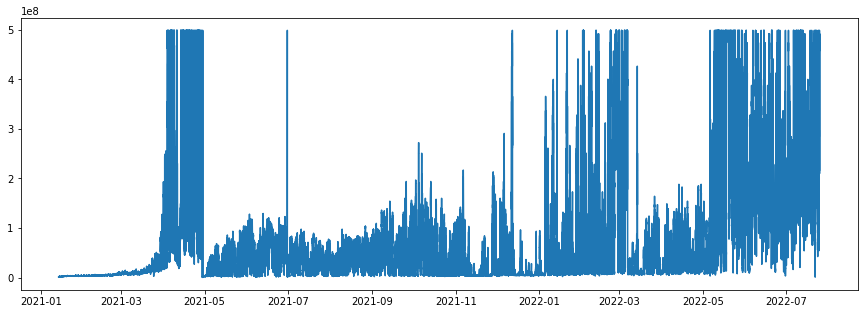

In [458]:
plt.figure(figsize=(15,5))
#plt.plot(norm(appa_clean[(appa_clean.index < "2021-06-30")].ZnOR_1) * max(appa_clean[(appa_clean.index > "2021-06-30")].ZnOR_1))
plt.plot(appa_clean.WO3_2)
plt.show()

In [539]:
appa_clean.loc[(appa_clean.index < "2021-06-30"), "ZnOR_2"] = norm(appa_clean[(appa_clean.index < "2021-06-30")].ZnOR_1) * max(appa_clean[(appa_clean.index > "2021-06-30")].ZnOR_2)

,ZnOR_1,ZnOR_2,LaFeO3_1,LaFeO3_2,WO3_1,WO3_2,ZnOR_heatR_1,ZnOR_heatR_2,LaFeO3_heatR_1,LaFeO3_heatR_2,...,ZnOR_heatV_2,LaFeO3_heatV_1,LaFeO3_heatV_2,WO3_heatV_1,WO3_heatV_2,Temperature,Relative_Humidity,Pressure,VOC,TimeSinceCreated
Time,,,,,,,,,,,,,,,,,,,,,
2021-01-14 00:00:39+00:00,228164.0,127363.0,639265.0,513355.0,920201.0,1392602.0,102.1,99.4,88.2,87.5,...,3.98,3.01,3.07,4.03,4.03,48.1,3.8,988.4,2983.74,0
2021-01-14 00:01:39+00:00,228571.0,127363.0,640320.0,512697.0,919257.0,1390009.0,102.1,99.4,88.2,87.5,...,3.99,3.01,3.07,4.02,4.03,48.1,3.8,988.6,2998.87,0
2021-01-14 00:02:39+00:00,228164.0,126984.0,639648.0,513479.0,918598.0,1391737.0,102.1,99.4,88.2,87.5,...,3.98,3.01,3.07,4.03,4.03,48.2,3.8,988.5,2995.5,0
2021-01-14 00:03:39+00:00,228164.0,126984.0,638022.0,512307.0,918033.0,1388286.0,102.1,99.4,88.2,87.5,...,3.98,3.01,3.07,4.02,4.03,48.2,3.7,988.6,3009.05,0
2021-01-14 00:04:39+00:00,227758.0,126858.0,638914.0,512492.0,916437.0,1388502.0,102.1,99.4,88.1,87.5,...,3.98,3.0,3.07,4.02,4.03,48.2,3.7,988.5,3003.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25 14:57:59+00:00,499000000.0,499000000.0,11636364.0,744186.0,32080200.0,209836064.0,128.5,129.0,500.0,111.3,...,4.03,3.91,3.65,2.39,2.57,41.5,19.5,985.5,5467.63,0
2022-07-25 14:58:59+00:00,499000000.0,499000000.0,11636364.0,739884.0,32820512.0,224561408.0,128.6,129.0,500.0,111.2,...,4.03,3.91,3.64,2.39,2.57,41.6,19.1,985.5,5501.55,0
2022-07-25 14:59:59+00:00,499000000.0,499000000.0,11636364.0,748538.0,32653062.0,220689648.0,128.5,129.1,500.0,111.2,...,4.03,3.91,3.64,2.39,2.57,41.7,19.4,985.5,5490.2,0


In [10]:
appa_hr = pd.read_csv("data/appa1_hr_cropped.csv")
appa_hr = appa_hr.drop(["Unnamed: 0"], axis=1)
appa_clean = appa_hr
appa_clean.Time = pd.to_datetime(appa_clean.Time)
appa_clean = appa_clean.set_index("Time")

In [11]:
"""
appa1_clean = appa1[appa1.Time >= '2021-01-14']
appa1_first = appa1_clean[appa1_clean.Time <= '2021-04-29']
appa1_second = appa1_clean[(appa1_clean.Time > '2021-04-29') & (appa1_clean.Time <= '2021-6-30')]
appa1_third = appa1_clean[(appa1_clean.Time > '2021-06-30') & (appa1_clean.Time <= '2022-1-14')]
appa1_fourth = appa1_clean[appa1_clean.Time > '2022-1-14']


appa_clean["ZnOR_1_TimeSinceCreated"] = 0
appa_clean["ZnOR_2_TimeSinceCreated"] = 0
appa_clean["LaFeO3_1_TimeSinceCreated"] = 0
appa_clean["LaFeO3_2_TimeSinceCreated"] = 0
appa_clean["WO3_1_TimeSinceCreated"] = 0
appa_clean["WO3_2_TimeSinceCreated"] = 0
"""

for i,row in appa_clean.iterrows():
    time_since = i.timestamp() - pd.Timestamp("2021-01-14").timestamp()

    appa_clean.loc[i,"ZnOR_1_TimeSinceCreated"] = time_since
    appa_clean.loc[i,"ZnOR_2_TimeSinceCreated"] = time_since
    appa_clean.loc[i,"LaFeO3_1_TimeSinceCreated"] = time_since
    appa_clean.loc[i,"LaFeO3_2_TimeSinceCreated"] = time_since
    appa_clean.loc[i,"WO3_1_TimeSinceCreated"] = time_since
    appa_clean.loc[i,"WO3_2_TimeSinceCreated"] = time_since
for i,row in appa_clean[appa_clean.index > "2021-4-29"].iterrows():
    time_since = i.timestamp() - pd.Timestamp("2021-4-29").timestamp()

    appa_clean.loc[i,"WO3_1_TimeSinceCreated"] = time_since
    appa_clean.loc[i,"WO3_2_TimeSinceCreated"] = time_since

In [568]:
appa_clean = appa_clean.drop(["TimeSinceCreated"], axis=1)

,ZnOR_1,ZnOR_2,LaFeO3_1,LaFeO3_2,WO3_1,WO3_2,ZnOR_heatR_1,ZnOR_heatR_2,LaFeO3_heatR_1,LaFeO3_heatR_2,...,NO2,SO2,O3,CO,ZnOR_1_TimeSinceCreated,ZnOR_2_TimeSinceCreated,LaFeO3_1_TimeSinceCreated,LaFeO3_2_TimeSinceCreated,WO3_1_TimeSinceCreated,WO3_2_TimeSinceCreated
Time,,,,,,,,,,,,,,,,,,,,,
2021-01-14 00:00:00,8.682981e+05,8.682981e+05,6.439906e+05,511907.200000,8.852432e+05,1.350952e+06,102.151667,99.416667,88.176667,87.505000,...,83.0,6.0,5.0,1.242000,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-14 01:00:00,9.593192e+05,9.593192e+05,6.508791e+05,517576.116667,1.035262e+06,1.638224e+06,101.971667,99.230000,87.950000,87.311667,...,78.0,5.0,5.0,1.250667,3600.0,3600.0,3600.0,3600.0,3600.0,3600.0
2021-01-14 02:00:00,9.476945e+05,9.476945e+05,6.515942e+05,515248.949153,1.000092e+06,1.579538e+06,102.008475,99.279661,87.988136,87.349153,...,78.0,6.0,4.0,1.244000,7200.0,7200.0,7200.0,7200.0,7200.0,7200.0
2021-01-14 03:00:00,9.539842e+05,9.539842e+05,6.532449e+05,514094.800000,9.996102e+05,1.577424e+06,101.996667,99.313333,88.010000,87.360000,...,79.0,6.0,4.0,1.262000,10800.0,10800.0,10800.0,10800.0,10800.0,10800.0
2021-01-14 04:00:00,9.880293e+05,9.880293e+05,6.515834e+05,512470.350000,1.024759e+06,1.604768e+06,102.061667,99.308333,87.995000,87.338333,...,74.0,5.0,3.0,1.190667,14400.0,14400.0,14400.0,14400.0,14400.0,14400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25 09:00:00,4.990000e+08,4.990000e+08,2.746416e+06,896828.316667,2.570732e+07,1.694804e+08,128.053333,128.596667,500.000000,110.955000,...,27.0,4.0,86.0,0.813333,48157200.0,48157200.0,48157200.0,48157200.0,39085200.0,39085200.0
2022-07-25 10:00:00,4.990000e+08,4.990000e+08,3.817816e+06,823806.716667,3.907949e+07,2.790144e+08,128.138333,128.601667,500.000000,110.950000,...,14.0,3.0,118.0,0.815333,48160800.0,48160800.0,48160800.0,48160800.0,39088800.0,39088800.0
2022-07-25 11:00:00,4.990000e+08,4.990000e+08,5.445447e+06,779633.583333,4.981345e+07,3.737091e+08,128.193333,128.683333,500.000000,110.933333,...,14.0,3.0,141.0,0.811333,48164400.0,48164400.0,48164400.0,48164400.0,39092400.0,39092400.0


In [13]:
appa_clean.to_csv("exports/appa_hr_crop_withCreated.csv")